In [63]:
import pandas as pd

In [64]:
data = pd.read_csv('advertising.csv')

In [65]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,27/03/2016 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,04/04/2016 1:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,13/03/2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,10/01/2016 2:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,03/06/2016 3:36,0


In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
sns.set()

# How 'age' of the person, affects the user advertisement click.

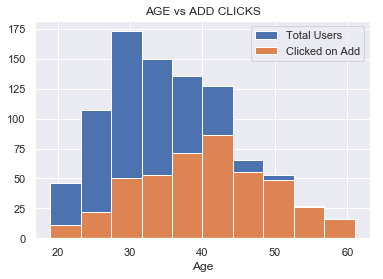

In [99]:
plt.hist(x=data['Age'],label= 'Total Users')
plt.hist(x=data['Age'][data['Clicked on Ad']==1],label= 'Clicked on Add')
plt.xlabel('Age')
plt.title('AGE vs ADD CLICKS')
plt.legend()
plt.savefig('AGE vs ADD CLICKS.png')

# How 'gender' of the person, affects the user advertisement click.

In [69]:
gender_data=pd.crosstab(data['Male'],data['Clicked on Ad'])

In [70]:
gender_data

Clicked on Ad,0,1
Male,,
0,229,236
1,232,203


In [71]:
gender_data.rename({0:'Female',1:'Male'},axis=0,inplace=True)

In [72]:
gender_data

Clicked on Ad,0,1
Male,,
Female,229,236
Male,232,203


(array([0, 1]), <a list of 2 Text xticklabel objects>)

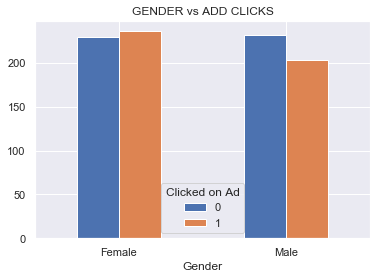

In [73]:
gender_data.plot(kind='bar')
plt.xlabel('Gender')
plt.title('GENDER vs ADD CLICKS')
plt.xticks(rotation=0)

# How 'country' of the person, affects the user advertisement click.

In [74]:
country_data=pd.crosstab(data['Country'],data['Clicked on Ad'])

In [75]:
country_data['total']=country_data.sum(axis=1)

In [76]:
country_data.head()

Clicked on Ad,0,1,total
Country,,,
Afghanistan,2,5,7
Albania,3,3,6
Algeria,3,3,6
American Samoa,2,3,5
Andorra,0,2,2


In [77]:
country_data=country_data.apply(lambda x:round(100*x/country_data['total']))

In [78]:
country_data.drop('total',axis=1,inplace=True)

In [79]:
country_data.head()

Clicked on Ad,0,1
Country,,
Afghanistan,29.0,71.0
Albania,50.0,50.0
Algeria,50.0,50.0
American Samoa,40.0,60.0
Andorra,0.0,100.0


In [80]:
country_data= country_data.sort_values(1,ascending=False)

In [81]:
country_data.head(10)

Clicked on Ad,0,1
Country,,
New Caledonia,0.0,100.0
Marshall Islands,0.0,100.0
British Indian Ocean Territory (Chagos Archipelago),0.0,100.0
Montenegro,0.0,100.0
Montserrat,0.0,100.0
Lithuania,0.0,100.0
Liechtenstein,0.0,100.0
Northern Mariana Islands,0.0,100.0
Palestinian Territory,0.0,100.0


In [82]:
country_data=country_data[:10].index.tolist()

In [83]:
country_data

['New Caledonia',
 'Marshall Islands',
 'British Indian Ocean Territory (Chagos Archipelago)',
 'Montenegro',
 'Montserrat',
 'Lithuania',
 'Liechtenstein',
 'Northern Mariana Islands',
 'Palestinian Territory',
 'Romania']

# How 'daily internet usage' of the person, affects the user advertisement click.

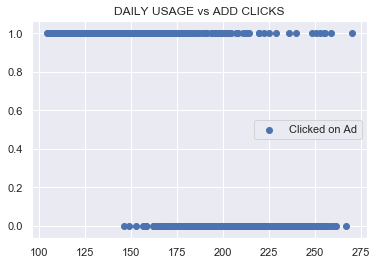

In [84]:
plt.scatter(x=data['Daily Internet Usage'], y=data['Clicked on Ad'])
plt.title('DAILY USAGE vs ADD CLICKS')
plt.legend()

# Logistic Regression

In [85]:
training_data=data[['Age','Male','Daily Internet Usage']]
output_data=data['Clicked on Ad']

In [86]:
from sklearn.model_selection import train_test_split as tts
X,x_test,Y,y_test= tts(training_data,output_data,test_size=0.3,random_state=42)

In [87]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [88]:
model.fit(X,Y)

C:\Users\vikas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [89]:
predictions=model.predict(x_test)

In [90]:
predictions[:5]

array([1, 1, 1, 0, 1], dtype=int64)

In [91]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [92]:
score = accuracy_score(predictions,y_test)
score

0.8925925925925926

In [93]:
test_data=pd.read_csv('Test.csv')
test_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp
0,50.78,51,49957.00,122.04,Vision-oriented asynchronous Internet solution,West David,0,Liberia,11/02/2016 17:02
1,40.47,38,24078.93,203.90,Sharable 5thgeneration access,Fraziershire,0,Burundi,22/07/2016 7:44
2,45.62,43,53647.81,121.28,Monitored homogeneous artificial intelligence,Robertfurt,0,Macao,26/06/2016 2:34
3,84.76,30,61039.13,178.69,Monitored 24/7 moratorium,South Pamela,0,Venezuela,14/05/2016 23:08
4,80.64,26,46974.15,221.59,Vision-oriented real-time framework,North Laurenview,0,Luxembourg,24/05/2016 10:04


In [94]:
test_data=test_data[['Age','Male','Daily Internet Usage']]
test_data.head()

,Age,Male,Daily Internet Usage
0,51,0,122.04
1,38,0,203.90
2,43,0,121.28
3,30,0,178.69
4,26,0,221.59


In [95]:
test_data.isnull().sum()

Age                     0
Male                    0
Daily Internet Usage    0
dtype: int64

In [96]:
test_predictions=model.predict(test_data)

In [97]:
submission=pd.DataFrame({
    'Clicked on Ad':test_predictions
})

In [98]:
submission.head()

,Clicked on Ad
0,1
1,0
2,1
3,0
4,0
